# Technical Report  
Darrell Cenido and Jon Larson  
CPSC 322, Fall 2025

## Introduction
The dataset we are using is a [Spotify track dataset](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-600k-tracks) from Kaggle that contains attributes such as popularity (which we are planning on classifying), danceability, duration_ms, artists, explicit, energy, release_date, etc.  

[We are planning on using the attributes mentioned above to help classify how popular a track is.]

> add a brief description of findings (e.g., what classifier approach performed the best)

In [17]:
from mysklearn.mypytable import MyPyTable

table = MyPyTable().load_from_file("cleaned_tracks.csv")

popularity = table.get_column("popularity")
energy = table.get_column("energy")
danceability = table.get_column("danceability")
duration_ms = table.get_column("duration_ms")

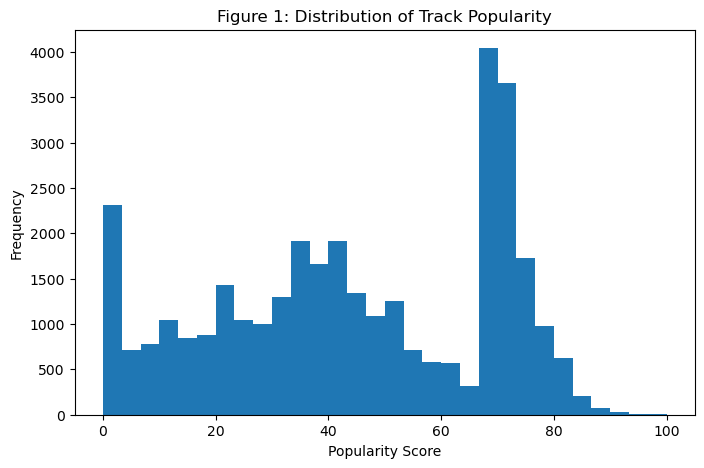

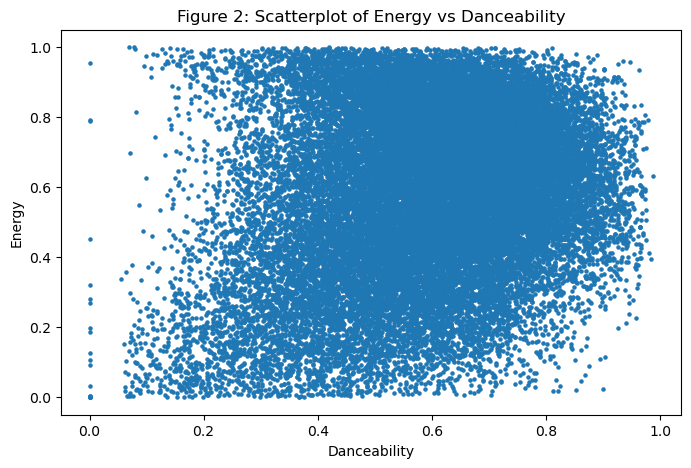

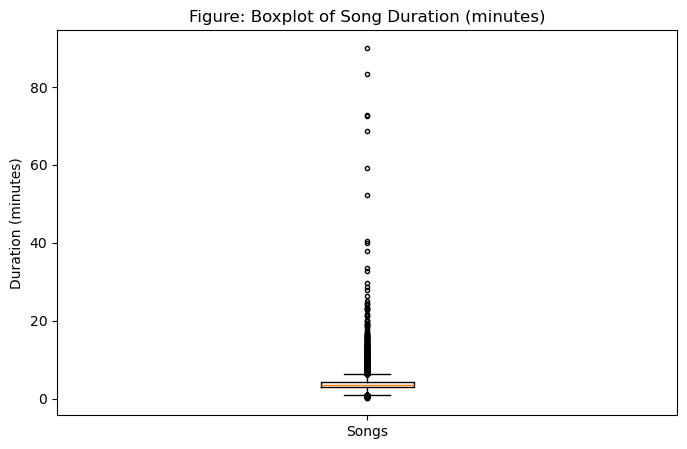

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(popularity, bins=30)
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.title("Figure 1: Distribution of Track Popularity")
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(danceability, energy, s=5)
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Figure 2: Scatterplot of Energy vs Danceability")
plt.show()

# Convert ms → minutes
duration_min = [d / 60000 for d in duration_ms]

plt.figure(figsize=(8,5))
plt.boxplot(duration_min, flierprops=dict(marker='o', markersize=3))

plt.ylabel("Duration (minutes)")
plt.xticks([1], ["Songs"])
plt.title("Figure: Boxplot of Song Duration (minutes)")

plt.ticklabel_format(style="plain", axis="y")  # keeps clean numeric labels
plt.show()


## Data Analysis

The Spotify dataset contains approximately 600,000 tracks, including attributes such as danceability, energy, duration_ms, explicit (boolean), release_date, and popularity (our classification label). The attributes include numeric features (e.g., danceability, duration_ms, energy), categorical features (e.g., explicit), string fields (e.g., artists), and date fields (release_date). For classification, we focus primarily on the numeric musical features because they are most consistently available across instances.

Our target variable is popularity, an integer from 0 to 100. Because popularity is a continuous score, we convert it into categories representing low (0-33), medium (34-66), and high (67-100) popularity. This makes popularity suitable for classification models.

To better understand the dataset, we computed basic summary statistics. The numeric attributes, such as danceability and energy, follow roughly bell-shaped distributions centered around mid-range values. Duration_ms, however, is strongly right-skewed due to extremely long tracks, which suggests the need for normalization or outlier handling. Explicit content also shows an imbalance, with the majority of tracks being non-explicit.

We visualized several key attributes to gain insight into the dataset. Figure one shows the distribution of track popularity and it illustrates that popularity scores are heavily concentrated between 0 and 50, with relatively few highly popular tracks. We compared energy and danceability in a scatterplot, showing a positive relationship between the two features, this suggests energetic songs also tend to be more danceable. Figure 3 presents a boxplot of duration_ms, highlighting extreme outliers that may need filtering before training models.

These analyses helped identify useful features for classification and highlighted necessary preprocessing steps such as scaling and removing outliers. Overall, the dataset appears clean and suitable for building classification models to predict track popularity.

## Classification Results

 > Classification Results: This section should describe the classification approach you developed and its performance. Explain what techniques you used, briefly how you designed and implemented the classifiers, how you evaluated your classifiers’ predictive ability, and how well the classifiers performed. Thoroughly describe how you evaluated performance, the comparison results, and which classifier is “best”.

#### Naive Bayes
We applied a Naive Bayes classifier to predict track popularity, using numeric musical features including explicit, duration_ms, danceability, energy, tempo, and loudness. Popularity, originally a continuous score from 0 to 100, was divided into three categories for classification: Low (0–33), Medium (34–66), and High (67–100).

Using 10-fold cross-validation, the classifier achieved an overall accuracy of 51% and an error rate of 49%. While the classifier performs reasonably well for Low and Medium popularity tracks, it struggles to correctly predict High popularity tracks due to their relative rarity in the dataset.

The confusion matrix showed us the performance of the classifier. We saw that Low class predictions had a 72% accuracy and High class predictions had a 74% accuracy.

#### Decision Tree
To get an accurate estimate of performance, we used 10-fold cross-validation. The average performance across all folds was 39% accuracy and 61% error rate. Decision trees tend to overfit, especially with noisy or imbalanced datasets and this likely contributed to the performance.

The majority of predictions fell into the Low popularity class, even when the true label was Medium or High. This occurs because a decision tree tends to follow majority class patterns unless it is normalized. Since musical features vary gradually, the boundaries between classes are unclear so the tree struggled to make crisp decision splits. 

It seemed that Medium was the hardest popularity to predict as only 1400 were correctly classified out of 11367 Medium class instances. This supports that decision splits were not crisp. Another thing that stood out was that our Low classification was quite accurate predicting 80% of instances accurately which was better than our Naive Bayes classifier with a 72% accuracy. 

Our decision tree was better at Low class predictions and Naive Bayes was better at high class predictions.

## Conclusion

 > Conclusion: Provide a brief conclusion of your project, including a short summary of the dataset you used (and any of its inherent challenges for classification), the classification approach you developed, your classifiers’ performance, and any ideas you have on ways to improve its performance.

 

## Acknowledgments

> Acknowledgments: This is where you should cite your sources, including any data, code, or materials that are outside of the scope of CPSC 322 (including previous course projects) that you used. As per the course syllabus, you also need to acknowledge any use of AI.

* Spotify Track Dataset (Kaggle): Spotify Dataset 1921–2020, 600k+ Tracks